In [3]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [6]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 22.0 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=744f79a82b6b723f5806a774d986aa5c0d8f0a5a38b87e8326fb5d1605db9758
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [7]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3760128/45929032 bytes (8.2%)8003584/45929032 bytes (17.4%)12083200/45929032 bytes (26.3%)16121856/45929032 bytes (35.1%)19841024/45929032 bytes (43.2%)24010752/45929032 bytes (52.3%)28155904/45929032 bytes (61.3%)32186368/45929032 bytes (70.1%)36413440/45929032 bytes (79.3%)40370176/45929032 bytes (87.9%)44531712/45929032 bytes (97.0%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [9]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *


# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [10]:
def addPixel(a,b):
    gl.glPointSize(10)
    gl.glBegin(gl.GL_POINTS)
    gl.glVertex2f(a/(WIDTH/2), b/(HEIGHT/2))
    gl.glEnd()

In [15]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(.5,.3,.7)

def findZone(x1, y1, x2, y2):
    zone = 0
    dx = x2 - x1
    dy = y2 - y1
    if abs(dx) >= abs(dy):
        if dx > 0 and dy > 0:
            zone = 0
        elif dx < 0 and dy > 0:
            zone = 3
        elif dx < 0 and dy < 0:
            zone = 4
        elif dx > 0 and dy < 0:
            zone = 7
    else:
        if dx > 0 and dy > 0:
            zone = 1
        elif dx < 0 and dy > 0:
            zone = 2
        elif dx < 0 and dy < 0:
            zone = 5
        elif dx > 0 and dy < 0:
            zone = 6
    return zone

def convertZero(z, x1, y1, x2, y2):
    if z == 0:
        return x1, y1, x2, y2
    elif z == 1:
        return y1, x1, y2, x2
    elif z == 2:
        return -y1, x1, -y2, x2
    elif z == 3:
        return -x1, y1, -x2, y2
    elif z == 4:
        return -x1, -y1, -x2, -y2
    elif z == 5:
        return -y1, -x1, -y2, -x2
    elif z == 6:
        return y1, -x1, y2, -x2
    elif z == 7:
        return x1, -y1, x2, -y2

def midpoint(z, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    d = 2 * dy - dx
    dE = 2 * dy
    dNe = 2 * (dy - dx)
    y = y1
    x = x1
    while x < x2:
        convertBack(z, x, y)
        if d > 0:  # next pixel: NE
            d += dNe
            x += 1
            #y += 1
        else:
            d += dE  # next pixel: E
            x += 1

def convertBack(z, x, y):
    if z == 0:
        addPixel(x, y)
    elif z == 1:
        addPixel(y, x)
    elif z == 2:
        addPixel(-y, x)
    elif z == 3:
        addPixel(-x, y)
    elif z == 4:
        addPixel(-x, -y)
    elif z == 5:
        addPixel(-y, -x)
    elif z == 6:
        addPixel(y, -x)
    elif z == 7:
        addPixel(x, -y)
 
def printDigits(x1, y1, x2, y2):
    zone = findZone(x1, y1, x2, y2)
    a, b, c, d = convertZero(zone, x1, y1, x2, y2)
    midpoint(zone, a, b, c, d)



def loadDigits(n):
    for i in digits:
        if i == int(n[-2]):
            for k in digits[i]:
                printDigits(k[0], k[1], k[2], k[3])
        if i == int(n[-1]):
            for k in digits[i]:
                printDigits(k[0]+80, k[1], k[2]+80, k[3])


digits = {
    0: [[0, 0, 1, 100], [-50, 99, 1, 100],
        [-51, -1, -50, 99], [-51, -1, 0, 0]],
    1: [[0, 0, 1, 100]],
    2: [[00, 50, 1, 100], [-50, 99, 1, 100],
        [-51, -1, -50, 50], [-51, -1, 0, 0],
        [-51, 50, 0, 51]],
    3: [[-50, 99, 1, 100], [-51, 50, 0, 51],
        [-51, -1, 0, 0], [1, 100, 0, 0]],
    4: [[-50, 99, -51, 50], [-51, 50, 0, 51],
        [1, 100, 0, 0]],
    5: [[0, 0, 1, 50], [-50, 99, 1, 100],
        [-51, 50, -50, 99], [-51, -1, 0, 0],
        [-51, 50, 0, 51]],
    6: [[0, 0, 1, 50], [-50, 99, 1, 100],
        [-51, -1, -50, 99], [-51, -1, 0, 0],
        [-51, 50, 0, 51]],
    7: [[0, 0, 1, 100], [-50, 99, 1, 100]],
    8: [[0, 0, 1, 100], [-50, 99, 1, 100],
        [-51, -1, -50, 99], [-51, -1, 0, 0],
        [-51, 50, 0, 51]],
    9: [[0, 0, 1, 100], [-50, 99, 1, 100],
        [-51, 50, -50, 99], [-51, -1, 0, 0],
        [-51, 50, 0, 51]],
} 

  


   



n = input("Enter your ID: ")
loadDigits(n)



 


Enter your ID: 20101589



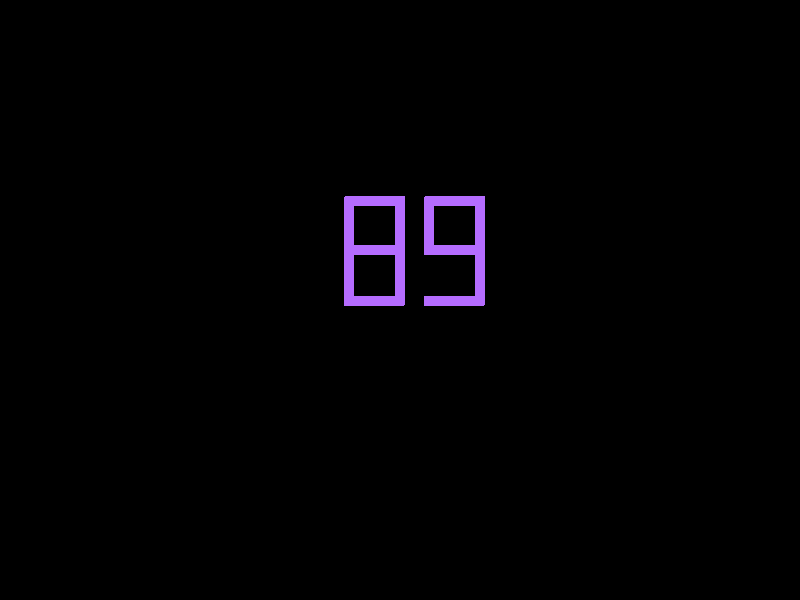

In [16]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)